In [ ]:
 #Custom data sets
import torch
from torch import nn

torch.__version__

'2.8.0+cu126'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Wed Aug 20 18:39:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

##Get Data

data set is subset of fod Food101 dataset

Food101 have 101 differenct class

our dataset have 10% of data and 3 classes of food

Why do this?

WHen starting out ML projects, its important to try things

this data set is only for experiment

In [ ]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists .. skipping download")
else:
  print(f"{image_path} does not exist, creating one")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  requests= requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("download dataset")
  f.write(requests.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("UNzipping pizza, steak sushi data")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi does not exist, creating one
download dataset
UNzipping pizza, steak sushi data


In [ ]:
##Data prep and data exploration
import os
def walk_thorugh_Dir(dir_path):
  """Walk thorugh the data rturening its contetns"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")


In [ ]:
walk_thorugh_Dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi' .
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train' .
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza' .
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak' .
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi' .
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test' .
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza' .
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak' .
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi' .


In [ ]:
#Setup train and testing path
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

1. Get all of the image paths
2. Pick a random image path using Python's random.choice
3. Get the image clas sname using `pathlib.Path.parent .stem`
4. open the image with `python.pil`
5.show the image and prin meta data

 Random image pssth: data/pizza_steak_sushi/test/steak/1016217.jpg
image class : steak
Image height: 512
Image width: 512


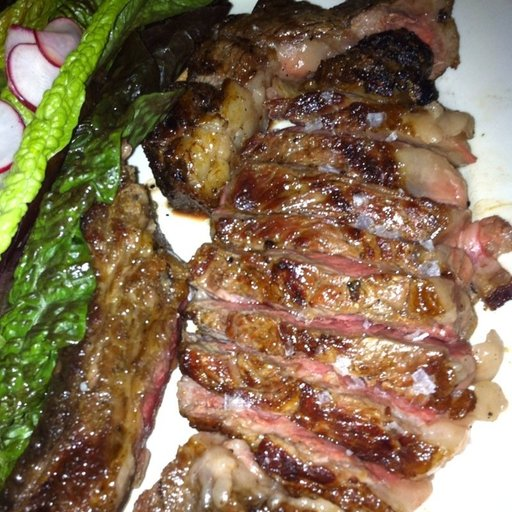

In [ ]:
import random
from PIL import Image

#random.seed(42)

#get image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list

#2.Pick random image path
random_image_path = random.choice(image_path_list)


image_class = random_image_path.parent.stem


#4.open image
img = Image.open(random_image_path)

#5 print metadata
print(f" Random image pssth: {random_image_path}")
print(f"image class : {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

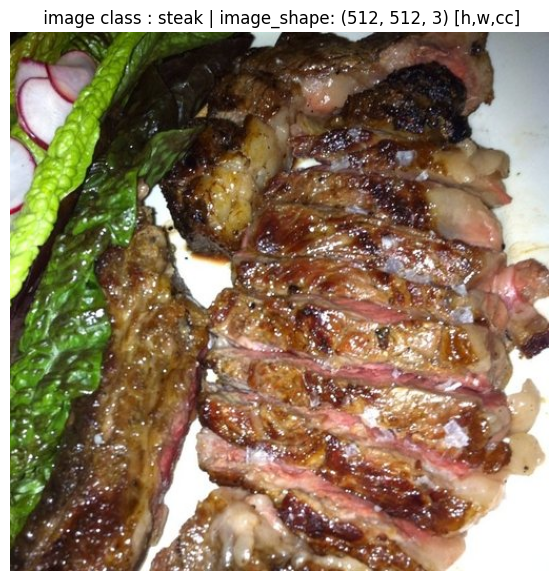

In [ ]:
#Try to visualize image with matplot lib
import numpy as np
import matplotlib.pyplot as plt

#turn image to array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f" image class : {image_class} | image_shape: {img_as_array.shape} [h,w,cc]")
plt.axis(False)

array([[[ 13,   6,   0],
        [ 17,  10,   0],
        [ 18,  11,   5],
        ...,
        [121, 124, 131],
        [122, 122, 130],
        [121, 121, 129]],

       [[ 14,   7,   0],
        [ 16,   9,   1],
        [ 16,   9,   3],
        ...,
        [123, 126, 133],
        [123, 123, 131],
        [122, 122, 130]],

       [[ 15,   8,   2],
        [ 14,   6,   3],
        [ 12,   7,   3],
        ...,
        [124, 127, 134],
        [122, 125, 132],
        [121, 124, 131]],

       ...,

       [[ 41,  32,  25],
        [ 43,  34,  27],
        [ 42,  33,  28],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]],

       [[ 46,  39,  33],
        [ 46,  39,  33],
        [ 46,  37,  32],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]],

       [[ 56,  49,  43],
        [ 55,  48,  42],
        [ 55,  46,  41],
        ...,
        [254, 255, 255],
        [253, 255, 254],
        [253, 255, 254]]], dtype=uint8)
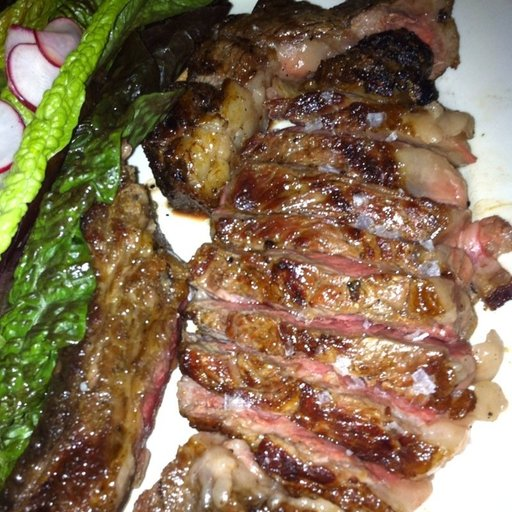

In [ ]:
img_as_array

##Transiformin data into pytorch tensors

Befor we can use the image data with pytorch :
1. Turn you target data into tensor (, num represntation images)
2.Turn data it into a  `troch.utils.data.Dataset`.
and subseqentky a  `torch.utils.data.Dataloader` we iwll call these data set and data loader

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

##3.1 Transorming data with torchvison.transofroms.

In [ ]:
#transfor for image
data_transform =  transforms.Compose([
    #resize the image 64,64
    transforms.Resize(size = (64,64)),
    #flip images
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into tenosr
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

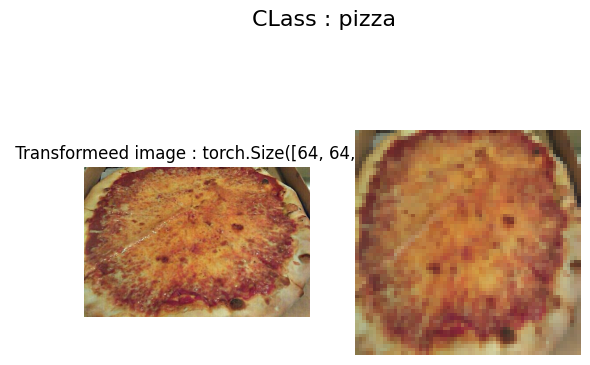

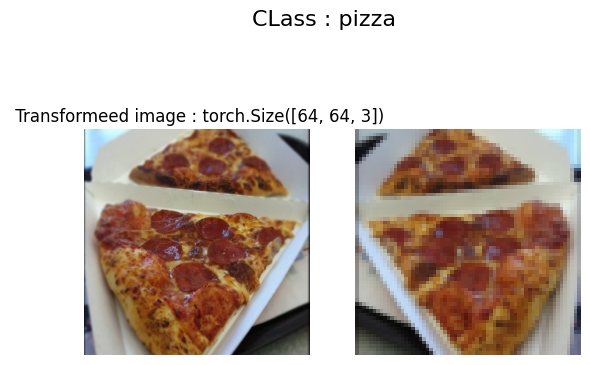

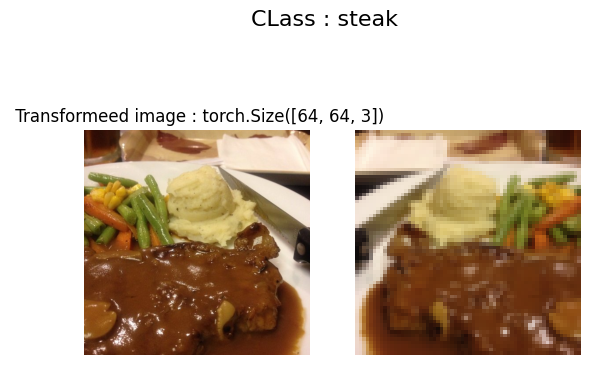

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  selects random images from a path of iamges and loads/transforms them then plots the orginal vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Orginal Image : {f.size}")
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[0].set_title(f" Transformeed image : {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"CLass : {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        seed=42)

##4. Option 1 Loading image data
we can load image classification data using torchvision.datasets.ImageFolder


In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None,
                                  )
test_data= datasets.ImageFolder(root=test_dir,
                                transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#Get class names
class_names= train_data.classes
class_names
#as dicts
cls_dict = train_data.class_to_idx
cls_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#check the lengths of our datasets
len(train_data),len(test_data)

(225, 75)

In [ ]:

img, label=train_data[0][0],train_data[0][1]

In [ ]:
class_names[label]

'pizza'

In [ ]:
print(f"IMage tesnsor:\n{img}")
print(f"images shape:\n {img.shape}")
print(f"images datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype :{type(label)}")


IMage tesnsor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

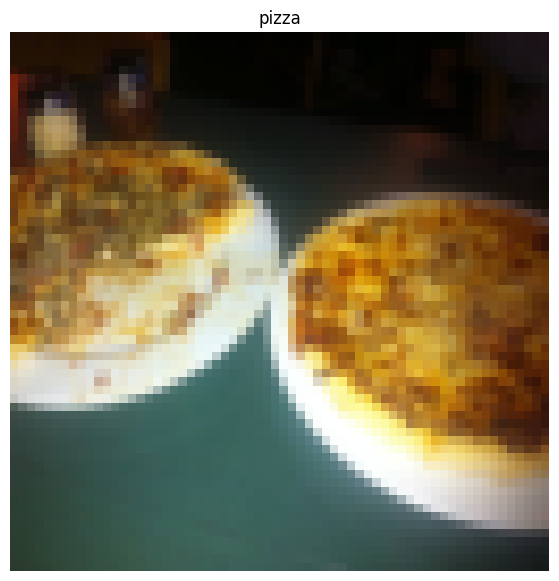

In [ ]:
image_permute=img.permute(1,2,0)

#print out shapes
plt.figure(figsize=(10,7))
plt.imshow(image_permute)
plt.title(class_names[label])
plt.axis("off")



In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
batch_size=1
train_data_loader= DataLoader(batch_size=batch_size,dataset=train_data,
                              num_workers=1, shuffle=True)
test_data_loader = DataLoader(batch_size=batch_size,
                              dataset=test_data,
                              shuffle=False,
                              num_workers=1)
train_data_loader,test_data_loader



(<torch.utils.data.dataloader.DataLoader at 0x7a79bcd7e720>,
 <torch.utils.data.dataloader.DataLoader at 0x7a79bcd055b0>)

In [ ]:
len(train_data_loader),len(test_data_loader)

(225, 75)

In [ ]:
img, label = next(iter(train_data_loader))

#Btach size 1
print(f"Image shape: {img.shape}")

Image shape: torch.Size([1, 3, 64, 64])


##Loading image data with custom dataste
1. Want to be able form file_requires_unicode
2. class names for data set
3. classes as dict form the dataset

Pros
* Can create dataset out of almos anything
* NOt limited to Pytorch pre-buil `Dataset` dunctions

Cons:

*EVen though you could create ,it might or maynot work

In [ ]:
import os
import torch
import pathlib

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
##5.1 creating an helper function get class names
target_directory = train_dir
print(f"target dir: {target_directory}")
#get the class names for the target dir
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes (directory:str) -> Tuple[List[str], Dict[str, int]]:
  """Find thre class folder names in a target directory"""
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f" file cannot be fount {directory} plese check")
  class_to_idx = {class_name: i for i,class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.2 create cosutom dataset  tp replicate image dtaa folder
TO creat our own coustom datset we want to :

2. SUbclass `torch.utils.data.Dataset`
2. init our subclass target dir
3. create attreibutes
  *path
  *transforms
  * classes
  *class_to_idx
4. create a fuction load images
5. overwrite the len method to return len
6. Over write the `__getitem()__` to return sample when written idx



In [ ]:
#Write a custom dataset class
from torch.utils.data import Dataset

#1. subclasss
class ImageFolderCustom(Dataset):

  def __init__(self, targ_dir:str,
               transform =None) -> None:
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # Convert generator to list
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

    #cerate a fucntion load image, takes the path form list and open the simage using PIL library
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len__()
  def __len__(self) -> int :
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    return img, class_idx

In [ ]:
#create a transform data
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size =(64,64)),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size =(64,64)),
                                       transforms.ToTensor()])

In [ ]:
#image folder custom class working
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms
                                      )
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a79bc9c0950>,
 <__main__.ImageFolderCustom at 0x7a79bc865460>)

In [ ]:
train_data, test_data_custom


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 <__main__.ImageFolderCustom at 0x7a79bc865460>)

In [ ]:
len(train_data),len(train_data_custom)

(225, 225)

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str]=None,
                          n: int =10,
                          display_shape: bool =True,
                          seed : int= None):
  if n>10:
    n=10
    display_shape=False
    print(f"For displau , purposes, n shouldn't ne ;arger than 10,steting to 10")
  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"  classs : {classes[targ_label]}"
      if display_shape:
        title = title + f" \nshape: { targ_image_adjust.shape}"
    plt.title(title)



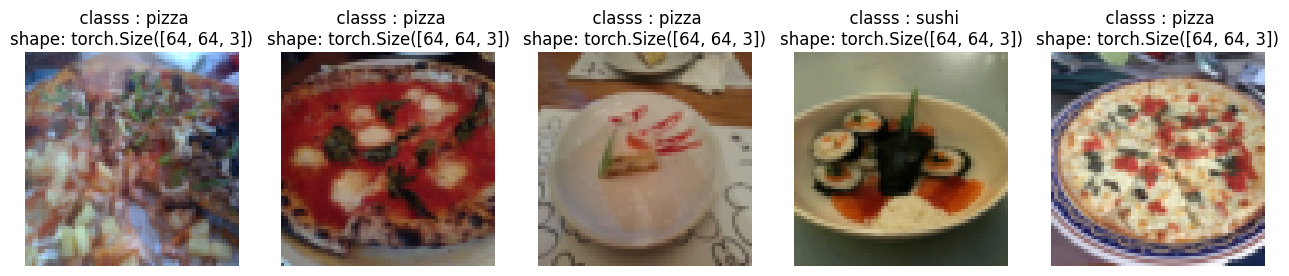

In [ ]:
display_random_images(train_data,
                      n=5,
                      classes= class_names,
                      seed=None)


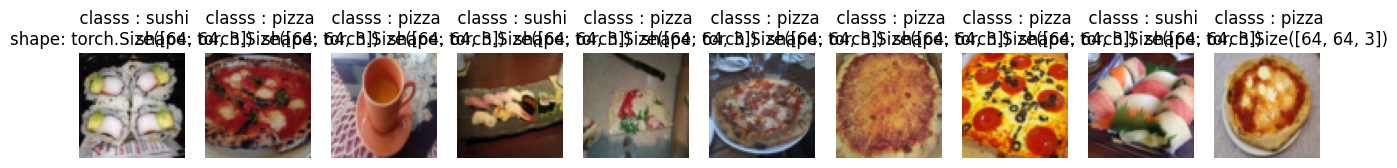

In [ ]:
display_random_images(train_data_custom,
                      n=10,
                      classes=class_names,
                      seed=42)

###custom data loaders


In [ ]:
#data loaders
from torch.utils.data import DataLoader
batch_size=32
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=batch_size,
                                     num_workers=0,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=batch_size,
                                     num_workers=0,
                                     shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a79bc7d0230>,
 <torch.utils.data.dataloader.DataLoader at 0x7a79bc7d0050>)

In [ ]:
#get image and label form custom data loader
img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Other forms of transforms
Data augmentation is the process of artificially add diversity  to trainig data.

ont type of data augmentation model

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                       transforms.ToTensor()])

train_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                       transforms.ToTensor()])



In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/2291093.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/244505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1899785.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1285298.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1968947.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2811032.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3821701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3018077.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3109486.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/218711.jpg')]

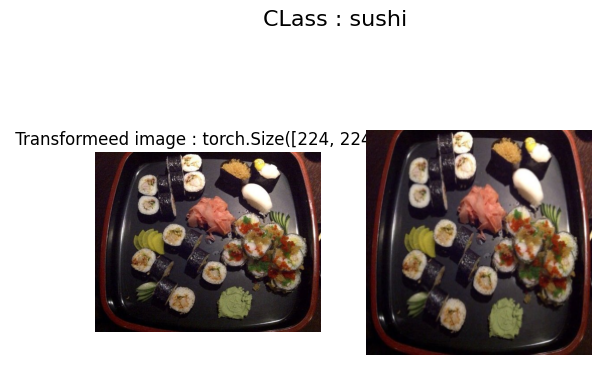

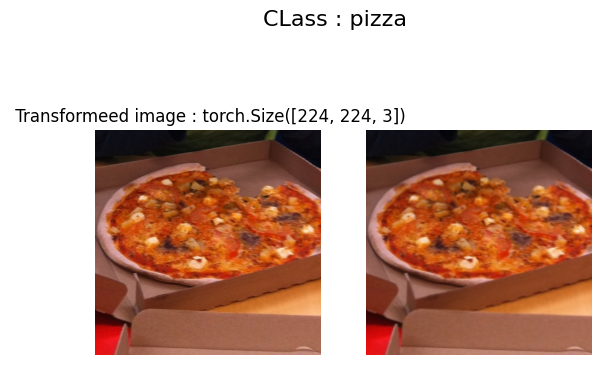

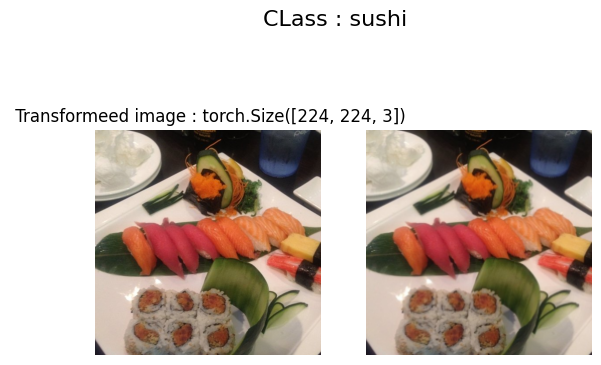

In [ ]:
#Plot random transoformed images
plot_transformed_images(image_paths = image_path_list,
                        transform = train_transforms,
                        n=3,
                        seed=None
                        )


##Model 0

In [ ]:
simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [ ]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root= train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root= test_dir,
                                         transform=simple_transform)

# turn data loaders

import os
from torch.utils.data import DataLoader

#Set batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS)

In [ ]:
class TinyVGG(nn.Module):
  """Modle architecture copying"""
  def __init__(self, input_shape:int,
               hidden_units:int,
               out_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=out_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x



In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  out_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
#try a forward pass on single image
image_batch, label_batch= next(iter(train_dataloader_simple))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
##7.4 torch.info shape ghoing thorug our model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  model.train()
  train_loss,train_acc  = 0, 0
  for X,y in dataloader: # Removed 'batch' from unpacking
    X,y= X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    loss =loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  #adjust metrics to get avg
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  model.eval()
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for X ,y in dataloader: # Removed 'batch' from unpacking

      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X) # Fixed: Pass X through the model

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim =1),dim =1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss =test_loss/(len(dataloader))
    test_acc = test_acc/ len(dataloader)
    return test_loss, test_acc # Added return statement

###7.6 Creating a `train()` function to combine train and test()

In [ ]:
from tqdm.auto import tqdm
#create a train  fucntion that takes in various function model
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer : torch.optim.Optimizer,
          loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int =5,
          device = device):
  results = { "train_loss": [],
             "train_acc": [],
              "test_loss": [],
              "test_acc": []
  }

  for epoch in tqdm(range(epochs)):
    train_loss , train_acc = train_step(model=model, dataloader=train_dataloader,loss_fn = loss_fn,
                                        optimizer = optimizer,
                                        device = device)
    test_loss, test_acc = test_step(model = model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    print(f"epch: {epoch} | Train_Acc : { train_acc} | Test loss : {test_loss} | test acc {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5

model_0 = TinyVGG(input_shape=3,
                  out_shape=(len(train_data.classes)),
                  hidden_units=10).to(device)
loss_fn =nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params=model_0.parameters(),
                            lr=0.001)

from timeit import default_timer as timer
start_time = timer()

#Train model_0
model_0_results = train(model = model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"Total trainig time :{end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

epch: 0 | Train_Acc : 0.3046875 | Test loss : 1.0983202854792278 | test acc 0.30113636363636365
epch: 1 | Train_Acc : 0.328125 | Test loss : 1.0697002808252971 | test acc 0.5416666666666666
epch: 2 | Train_Acc : 0.48828125 | Test loss : 1.0808666547139485 | test acc 0.49242424242424243
epch: 3 | Train_Acc : 0.40234375 | Test loss : 1.0605571269989014 | test acc 0.5729166666666666
epch: 4 | Train_Acc : 0.421875 | Test loss : 1.0658424695332844 | test acc 0.5643939393939394
Total trainig time :4.418 seconds


In [ ]:
model_0_results

{'train_loss': [1.106320008635521,
  1.099792942404747,
  1.0868915617465973,
  1.0846154242753983,
  1.0662306994199753],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.40234375, 0.421875],
 'test_loss': [1.0983202854792278,
  1.0697002808252971,
  1.0808666547139485,
  1.0605571269989014,
  1.0658424695332844],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5729166666666666,
  0.5643939393939394]}

## Plot the loss curves
A **loss curves** is way of tracing your mod

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, list[float]]):
  """plots all the curves of a results dirctionary"""
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_acc = results["test_acc"]

  ##Figurethe epochs
  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))

  #Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss , label="train_loss")
  plt.plot(epochs,test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_acc, label="test_accuracy")

  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend();


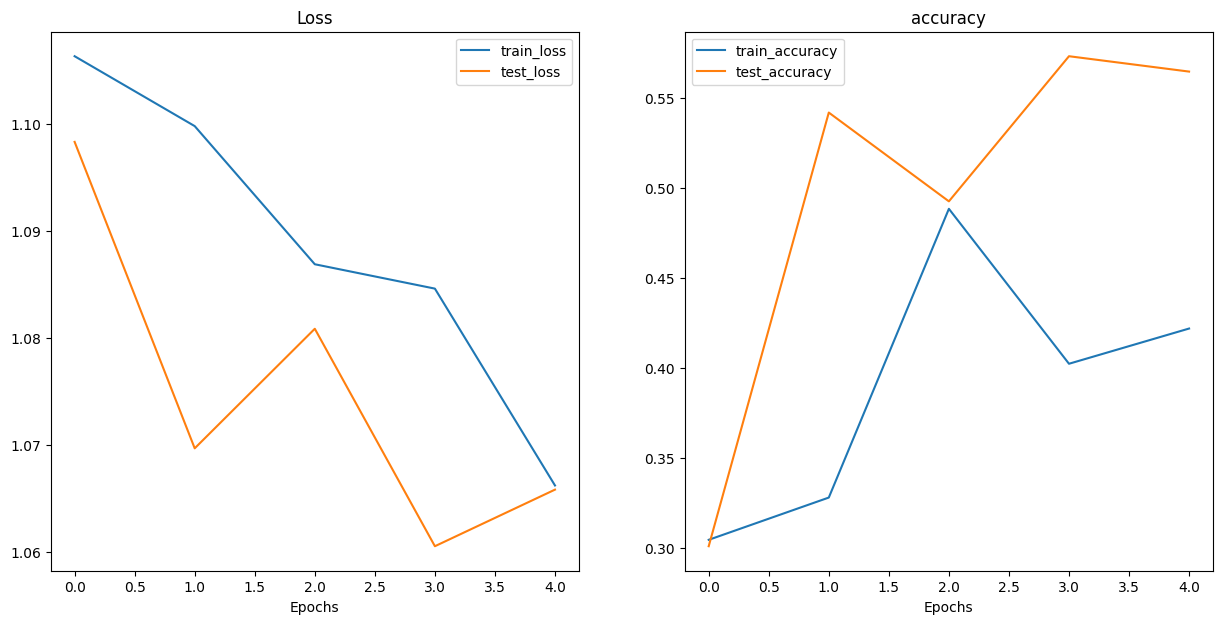

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
###model TinyVGG with data augmentation
train_transform_trivial = transforms.Compose((
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
))

test_transform_simple = transforms.Compose((
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
))


##.Crate traoin and test datet

In [ ]:
#TUrn image folders inti Datasets
from torchvision import datasets
train_data_augmented= datasets.ImageFolder(root=train_dir,
                                           transform=train_transform_trivial)
test_data_simple= datasets.ImageFolder(root=train_dir,
                                           transform=test_transform_simple)

In [ ]:
#dataset into data loader
import os
BATCH_SIZE= 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
tes_dataloader_simple = DataLoader(dataset = test_data_simple,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

In [ ]:
##Tarin model 1
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  out_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"Total training time for model_1 : {end_time-start_time: .3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

epch: 0 | Train_Acc : 0.25 | Test loss : 1.0962443351745605 | test acc 0.2604166666666667
epch: 1 | Train_Acc : 0.42578125 | Test loss : 1.1206491390864055 | test acc 0.2604166666666667
epch: 2 | Train_Acc : 0.42578125 | Test loss : 1.156175673007965 | test acc 0.2604166666666667
epch: 3 | Train_Acc : 0.3046875 | Test loss : 1.1611759265263875 | test acc 0.3229166666666667
epch: 4 | Train_Acc : 0.33984375 | Test loss : 1.1594014167785645 | test acc 0.20833333333333334
Total training time for model_1 :  6.550


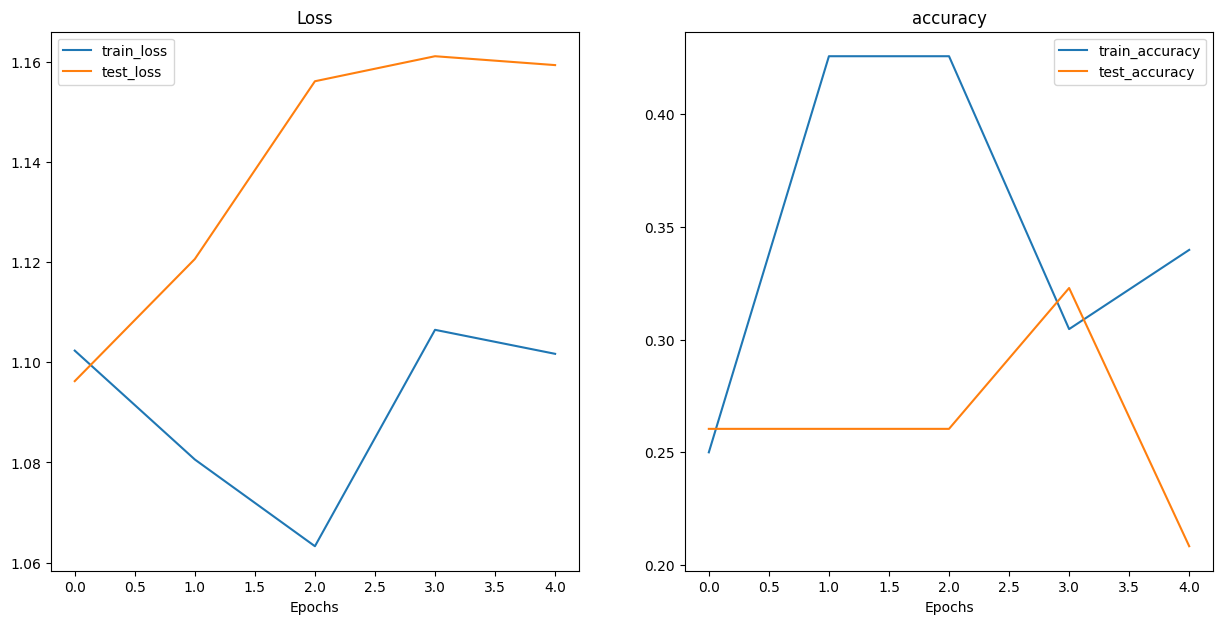

In [ ]:
plot_loss_curves(model_1_results)

###10 compare model results
After evaluating out model modelling experiments on there own

tips to compare model resulst.
1. Tensor board(pytorch)
2. weights and biases
3. MLflow


In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106320   0.304688   1.098320  0.301136
1    1.099793   0.328125   1.069700  0.541667
2    1.086892   0.488281   1.080867  0.492424
3    1.084615   0.402344   1.060557  0.572917
4    1.066231   0.421875   1.065842  0.564394

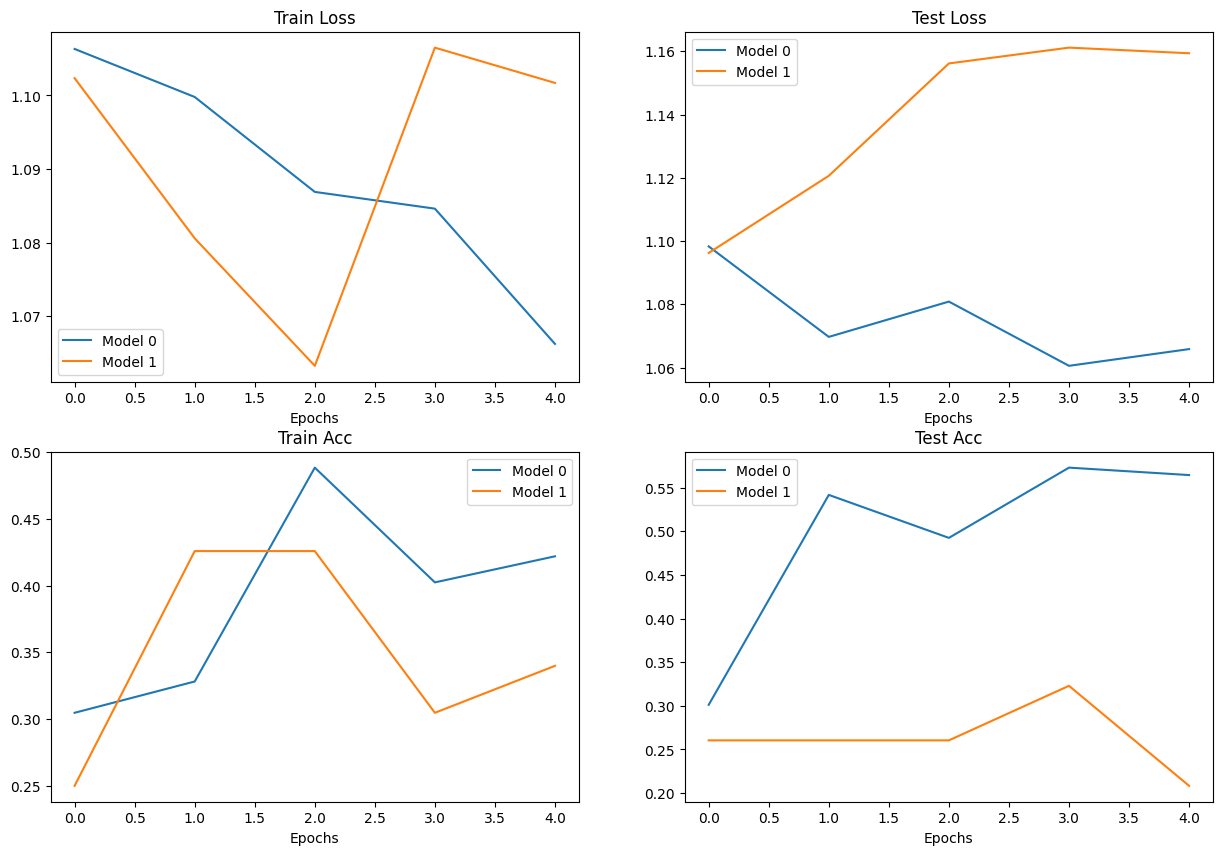

In [ ]:
## Setup a plot
plt.figure(figsize=(15,10))
epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label ="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label ="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label ="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label ="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend();



In [ ]:
##Making data

import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/images/04-pizza-dad.jpeg")
    print(f" downloading {custom_image_path}")
    f.write(request.content)
else:
  print(f"{custom_image_path} file already exsists")

data/04-pizza-dad.jpeg file already exsists


In [ ]:
import torchvision

custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n {custom_image_unit8}")
print(f" custom image shape{ custom_image_unit8.shape}")


Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
 custom image shapetorch.Size([3, 4032, 3024])


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

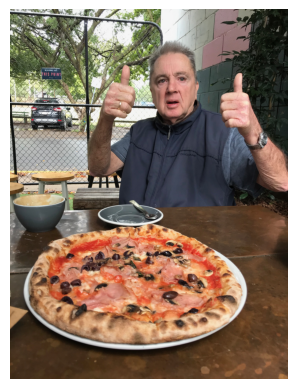

In [ ]:
plt.imshow(custom_image_unit8.permute(1,2,0))
plt.axis("off")

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_unit8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [ ]:
#create a transform pipleine
from torchvision import transforms
custom_image_transforms= transforms.Compose([transforms.Resize(size=(64,64))])

In [ ]:
from torchvision import datasets
custom_image_transformed = custom_image_transforms(custom_image)

print(f"custom image shape {custom_image.shape}")
print(f" Transformed shape: {custom_image_transformed.shape}")

custom image shape torch.Size([3, 4032, 3024])
 Transformed shape: torch.Size([3, 64, 64])


In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed.to(device))


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_pred=model_1(custom_image_transformed.unsqueeze(dim=0).to(device))
custom_pred

['pizza', 'steak', 'sushi']

Note to make a prediction we have to :
* load the image,
* turn to temsor,
* same data type
* same device,
* and same shape as trained data
* and same batch size dimension or shape

In [ ]:
#convert logits to -> probs
custom_image_pred_probs = torch.softmax(custom_pred, dim=1)
custom_image_pred_probs

tensor([[1.0000e+00, 8.3697e-20, 2.3014e-21]], device='cuda:0')

In [ ]:
custom_image_pred_labels= torch.argmax(custom_image_pred_probs, dim=1)

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

In [ ]:
def pred_and_plot_image(model : torch.nn.Module,
                        image_path : str,
                        class_names: List[str]=None,
                        transform =None,
                        device = device):
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)
  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image=target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))

    target_image_probs = torch.softmax(target_image_pred ,dim=1)

    target_image_pred_labels = torch.argmax(target_image_probs, dim = 1)

    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
      title = f" Pred {class_names[target_image_pred_labels.cpu()]} | Prob : {target_image_probs.max()}"
    else:
      title = f"Pred: {target_image_pred_labels} | Prob : { target_image_probs.max()}"
    plt.title(title)
    plt.axis("off")



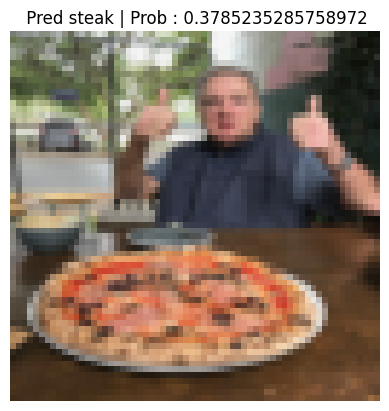

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform= custom_image_transforms,
                    device=device)